1. Modeling of carbon cycle
In this problem, we will build a box model to understand the Earth’s carbon cycle based on the framework in Tomizuka 2009.

1.1 [15 points] Following equation 1-2 (without the buffer effect), build a two-box model to compute the atmospheric CO2 level in ppm (parts per million) from 1987 to 2004.

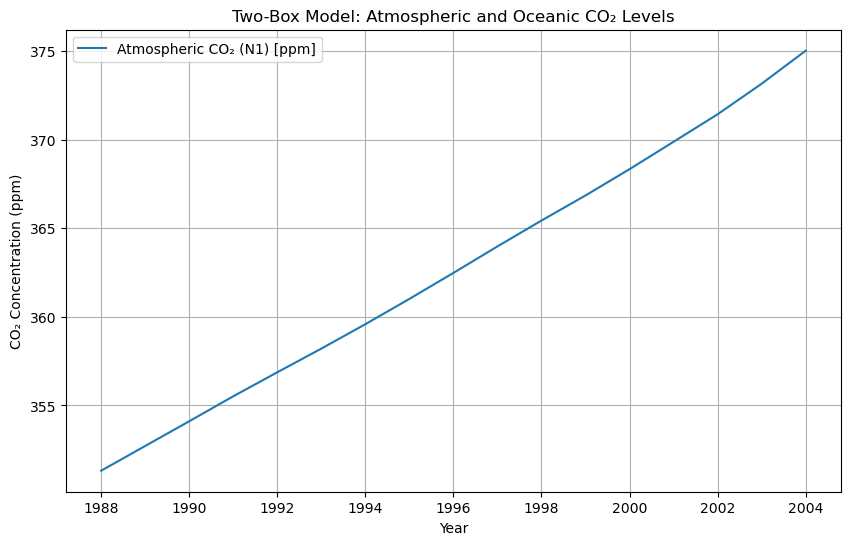

[347.4178403755869, 348.65514438834265, 349.9453773315569, 351.3144392120639, 352.7097297645134, 354.10408307208826, 355.5128987206812, 356.86690693969643, 358.20277835762903, 359.58048156626165, 361.0075916097184, 362.4741589948121, 363.96988050823416, 365.42826182189617, 366.8438173734215, 368.32836417004967, 369.87316811954724, 371.42408278090426, 373.1485894268132, 375.0099993561208]


In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 初始条件和参数
dt = 1  # 时间步长 (1年)
N1_initial = 740 / 2.13  # 初始大气 CO2 浓度 (ppm)
N2_initial = 900 / 2.13  # 初始海洋 CO2 浓度 (ppm)

# 读取数据，计算gamma
data = pd.read_csv("global.1751_2008.csv",
                  skiprows=[1])  # 替换为实际数据文件名

# 清理和重命名列
data.rename(columns=lambda x: x.strip(), inplace=True)  # 去除列名中的多余空格

# 将 Year 列转换为整数
data['Year"'] = data['Year"'].astype(int)

# 筛选1986到2004年的数据
data = data[(data['Year"'] >= 1986) & 
(data['Year"'] <= 2004)].reset_index(drop=True)

# 计算gamma
data['gamma'] = (
    data['Total carbon emissions from fossil-fuels (million metric tons of C)']
    /2120)

# 时间范围
years = data['Year"'].values  # 使用筛选后的年份

# 初始化数组
N1 = [N1_initial]
N2 = [N2_initial]
k12 = 105 / 740  # 从大气到海洋
k21 = 102 / 900  # 从海洋到大气


# 迭代求解
for i in range(len(years)):
    gamma = data['gamma'].iloc[i]  # 获取该年的gamma

    # 微分方程的欧拉法更新
    dN1_dt = -k12 * N1[-1] + k21 * N2[-1] + gamma
    dN2_dt = k12 * N1[-1] - k21 * N2[-1]

    N1_next = N1[-1] + dN1_dt * dt
    N2_next = N2[-1] + dN2_dt * dt

    N1.append(N1_next)
    N2.append(N2_next)

# 绘制结果
plt.figure(figsize=(10, 6))
plt.plot(years[2:], N1[3:], label="Atmospheric CO₂ (N1) [ppm]")
#plt.plot(years[2:], N2[3:], label="Oceanic CO₂ (N2) [ppm]")
plt.xlabel("Year")
plt.ylabel("CO₂ Concentration (ppm)")
plt.title("Two-Box Model: Atmospheric and Oceanic CO₂ Levels")
plt.legend()
plt.grid()
plt.show()
print(N1)

1.2 [20 points] Following equation 3-4 (with the buffer effect), build a two-box model to compute the atmospheric CO2 level in ppm from 1987 to 2004.

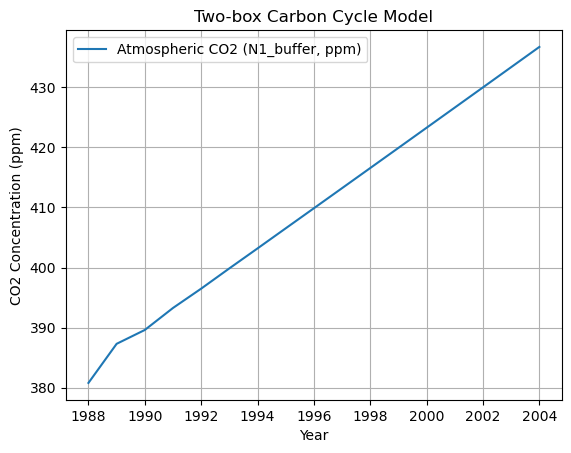

[380.77857832515474, 387.29151159421883, 389.59898234875556, 393.26359635894784, 396.4841742359513, 399.8580339395494, 403.1838521591841, 406.53062908620814, 409.87423167603066, 413.2231632030673, 416.5742974451529, 419.9287226040977, 423.2859758306293, 426.64617566351905, 430.0092205386183, 433.3750948124573, 436.743750058905]


In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 读取排放碳数据
data = pd.read_csv("global.1751_2008.csv",
                  skiprows=[1]) 

# 清理和重命名列
data.rename(columns=lambda x: x.strip(), inplace=True)  # 去除列名中的多余空格

# 将 Year 列转换为整数
data['Year"'] = data['Year"'].astype(int)

# 筛选1986到2004年的数据
data = data[(data['Year"'] >= 1986) & (data['Year"'] <= 2004)].reset_index(drop=True)

# 计算gamma,由表格中每年排碳量除以1000，除以2.12，转为ppm单位
data['gamma'] = (
    data['Total carbon emissions from fossil-fuels (million metric tons of C)']
    /2120)

# 参数设定
k12 = 105 / 740  # 从大气到海洋
k21 = 102 / 900  # 从海洋到大气
N2_0 = 821 / 2.13  # 海洋基准CO2
dt = 1  # 时间步长为1年

# xi(z) 的函数定义
def compute_xi(z):
    return 3.69 + 1.86e-2 * z - 1.80e-6 * z**2

# 初始值
N1_buffer = 740 / 2.13  # 大气初始CO2
N2_buffer = 900 / 2.13  # 海洋初始CO2

# 存储结果
years = data['Year"']
N1_buffer_list = [N1_buffer]
N2_buffer_list = [N2_buffer]


# 数值求解
for i in range(1, len(years)):
    xi = compute_xi(N1_buffer)
    #gamma = data['gamma'].iloc[i]
    dN1_buffer_dt = -k12 * N1_buffer + k21 * (N2_0 + xi * (N2_buffer - N2_0)) + gamma
    dN2_buffer_dt = k12 * N1_buffer - k21 * (N2_0 + xi * (N2_buffer - N2_0))
    
    N1_buffer += dN1_buffer_dt * dt
    N2_buffer += dN2_buffer_dt * dt
    
    N1_buffer_list.append(N1_buffer)
    N2_buffer_list.append(N2_buffer)

# 绘图
plt.plot(years[2:], N1_buffer_list[2:], label='Atmospheric CO2 (N1_buffer, ppm)')
#plt.plot(years[2:], N2_buffer_list[2:], label='Oceanic CO2 (N2_buffer, ppm)')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.title('Two-box Carbon Cycle Model')
plt.legend()
plt.grid()
plt.show()
print(N1_buffer_list[2:])

1.3 [5 points] Based on your results from 1.1 and 1.2, reproduce Figure 2 in Tomizuka (2009) as much as you can.

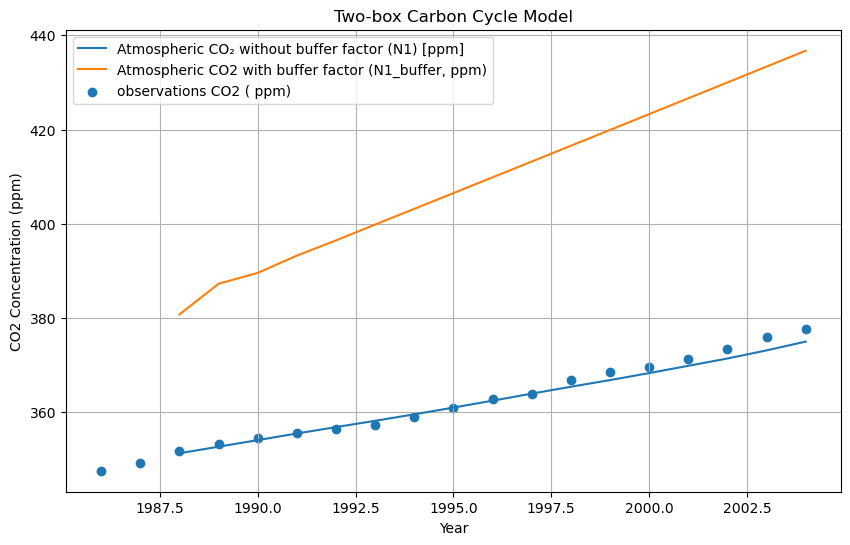

In [121]:
# 读取数据，计算gamma
data_annmean_co2 = pd.read_csv("co2_annmean_mlo.csv")  # 替换为实际数据文件名
# 筛选1986到2004年的数据
data_annmean_co2 = data_annmean_co2[(data_annmean_co2['year'] >= 1986) &
(data_annmean_co2['year'] <= 2004)].reset_index(drop=True)

# 绘图
plt.figure(figsize=(10, 6))
plt.plot(years[2:], N1[3:], 
         label="Atmospheric CO₂ without buffer factor (N1) [ppm]")
plt.plot(years[2:], N1_buffer_list[2:], 
         label='Atmospheric CO2 with buffer factor (N1_buffer, ppm)')
plt.scatter(years, data_annmean_co2['mean'], 
            label='observations CO2 ( ppm)')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.title('Two-box Carbon Cycle Model')
plt.legend()
plt.grid()
plt.show()



[Bonus] [10 points] Following equation 5-13, compute the atmospheric CO2 level in ppm and reproduce Figure 4 in Tomizuka (2009).

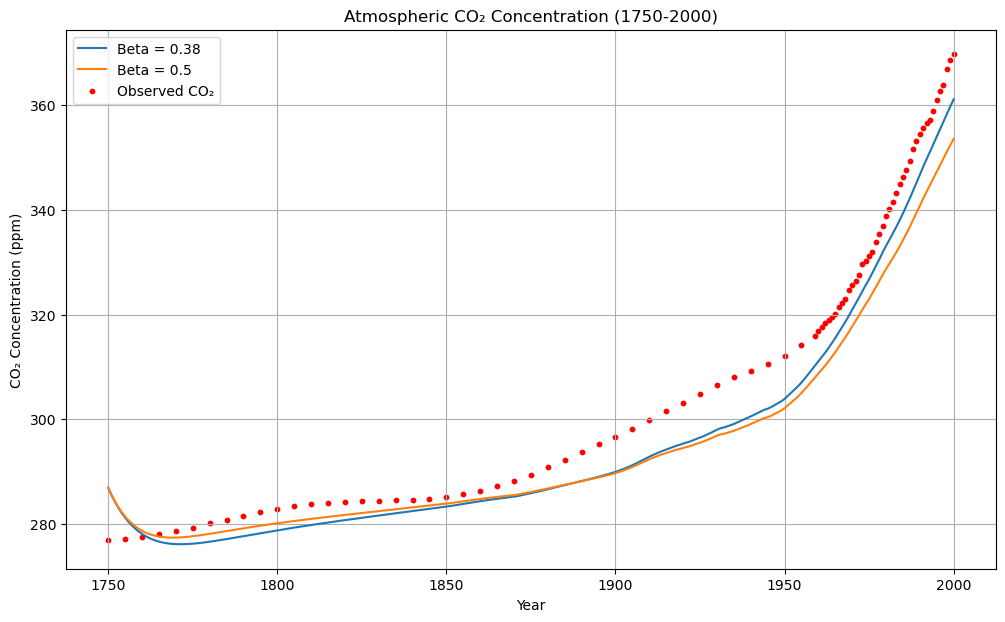

In [129]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# ---------------- 数据读取与处理 ----------------

# 读取排放碳数据
data = pd.read_csv("global.1751_2008.csv", skiprows=[1])
data.rename(columns=lambda x: x.strip(), inplace=True)  # 去除列名空格
data['Year'] = data['Year"'].astype(int)  # 将年份转换为整数
data = data[(data['Year'] >= 1750) & (data['Year'] <= 2000)].reset_index(drop=True)

# 计算 gamma (碳排放转换成 ppm)
data['gamma'] = (
    data['Total carbon emissions from fossil-fuels (million metric tons of C)']
    / 2130)

# 读取土地利用变化数据
Global_land_use = pd.read_excel('Global_land-use_flux-1750_2005.xls')
Global_land_use = Global_land_use[['Year', 'Global']]
Global_land_use = Global_land_use[(Global_land_use['Year'] >= 1750)
&(Global_land_use['Year'] <= 2000)]
Global_land_use['LandUseChange'] = Global_land_use['Global'] / (1000 * 2.13)

# 读取二氧化碳观测数据
CO2_Ob = pd.read_csv('1750-2000CO2.csv')
CO2_Ob = CO2_Ob[(CO2_Ob['year'] >= 1750) & (CO2_Ob['year'] <= 2000)]

# ---------------- 常数定义 ----------------

# 初始净初级生产力 (f0) 和前工业时代大气 CO₂ 浓度 (P0)
f0 = 62 / 2.13  # PgC/年
P0 = 615 / 2.13  # ppm

# 初始碳含量 (PgC)
N1_0 = 615 / 2.13     # 大气
N2_0 = 842 / 2.13     # 表层海洋
N3_0 = 9744 / 2.13    # 中层海洋
N4_0 = 26280 / 2.13   # 深层海洋
N5_0 = 90000000 / 2.13  # 沉积物
N6_0 = 731 / 2.13     # 生物圈
N7_0 = 1238 / 2.13    # 土壤

# 碳通量系数
k12 = 60 / 615
k21 = 60 / 842
k23 = 9 / 842
k24 = 43 / 842
k32 = 52 / 9744
k34 = 162 / 9744
k43 = 205 / 26280
k45 = 0.2 / 26280
k51 = 0.2 / 90000000
k67 = 62 / 731
k71 = 62 / 1328

# 计算年份范围
years = np.arange(1750, 2001)

# 定义 beta 参数
beta_values = [0.38, 0.5]
P_atm_results = {}  # 存储不同 beta 的结果

# ---------------- 碳库计算部分 ----------------

for beta in beta_values:
    # 初始碳库
    N1, N2, N3, N4, N5, N6, N7 = N1_0, N2_0, N3_0, N4_0, N5_0, N6_0, N7_0
    atmosphere = []  # 用于记录大气 CO₂ 浓度 (ppm)

    for year in years:
        # 提取当前年份的 gamma 和 delta
        gamma = data[data['Year'] == year]['gamma'].values[0] if year in data['Year'].values else 0
        delta = Global_land_use[Global_land_use['Year'] == year]['LandUseChange'].values[0] if year in Global_land_use['Year'].values else 0

        # 计算反馈系数 xi 和净初级生产力 f
        xi = 3.69 + 0.0186 * N1 - 0.0000018 * N1**2
        f = f0 * (1 + beta * np.log(N1 / P0))

        # 七箱模型微分方程（变化率）
        dN1_dt = (-k12 * N1 + k21 * (N2_0 + xi * (N2 - N2_0)) + gamma - f + delta + k51 * N5 + k71 * N7)
        dN2_dt = (k12 * N1 - k21 * (N2_0 + xi * (N2 - N2_0)) - k23 * N2 + k32 * N3 - k24 * N2)
        dN3_dt = (k23 * N2 - k32 * N3 - k34 * N3 + k43 * N4)
        dN4_dt = (k34 * N3 - k43 * N4 + k24 * N2 - k45 * N4)
        dN5_dt = (k45 * N4 - k51 * N5)
        dN6_dt = (f - k67 * N6 - 2 * delta)
        dN7_dt = (k67 * N6 - k71 * N7 + delta)

        # 更新碳库值 (Euler 法)
        N1 += dN1_dt
        N2 += dN2_dt
        N3 += dN3_dt
        N4 += dN4_dt
        N5 += dN5_dt
        N6 += dN6_dt
        N7 += dN7_dt

        # 计算大气 CO₂ 浓度 (ppm)
        #P_atm = (N1 / 615) * P0
        atmosphere.append(N1)
    
    # 保存当前 beta 的结果
    P_atm_results[beta] = atmosphere

# ---------------- 绘图部分 ----------------

plt.figure(figsize=(12, 7))

# 绘制不同 beta 值的模拟结果
for beta, P_atm in P_atm_results.items():
    plt.plot(years, P_atm, label=f'Beta = {beta}')

# 绘制观测数据
plt.scatter(CO2_Ob['year'], CO2_Ob['mean'], color='red', s=10, label='Observed CO₂')

# 图形美化
plt.xlabel('Year')
plt.ylabel('CO₂ Concentration (ppm)')
plt.title('Atmospheric CO₂ Concentration (1750-2000)')
plt.legend()
plt.grid()
plt.show()
